In [ ]:
%reload_ext postcell
%postcell register

# Classes and object oriented programming

Several times you have seen the notation something.somefunction(). We will explore this syntax here. Since the first lecture, we have been studying two categories of programming constructs: things and stuff you can do to those things.

We have seen numbers and the arithmetic operations which can be done on those numbers. Strings and the various functions which operate on them. Lists, dictionaries, tuples, charts, random distributions and functions which can be used on them. Nouns and verbs.

You can write your own version of the max or min functions, but how do you write your own list or dictionary? Recall that once you insert an item into a list or a dictionary, it remembers! At a later time, you can ask for that inserted value back.

Say you wish to record student grades and perform some operations on them:

In [ ]:
names    = ["Bart", "Lisa", "Milhouse", "Nelson"]
grades   = [34, 97, 87, 30]
aggressiveness = [81, 15, 2, 93]
ages     = [10, 8, 10, 12]

In [ ]:
def get_grade(name, names, grades):
    name_index = names.index(name)
    return grades[name_index]

def get_aggressiveness(name, names, grades):
    name_index = names.index(name)
    return aggressiveness[name_index]
    

In [ ]:
get_grade("Nelson", names, grades)

In [ ]:
get_aggressiveness("Lisa", names, aggressiveness)

**Exercise** Write a function `get_age` which returns a student's age, similar to the other two functions defined above

In [ ]:
%%postcell exercise_025_200_a

#Type code here

### Classes provide _encapsulation_
Classes combine functions and state (aka data structures) into a single construct.

For example, notice that in the example above, we have defined 4 different lists containing attributes of students. Further, we have three functions (including your exercise) which operate on those data structures. An object oriented programmer will consider this unweildy: items which belong together are spread across various lists and functions. A class will combine them into a single, logical, unit.

Here is an object oriented version of the code above:

In [ ]:
class Student(): #<=== Class name
    
    def __init__(self, name, grade, aggressiveness, age): #<=== Consturctor...because it is used to "construct" the object
        # Instance variables
        self.name = name
        self.grade = grade
        self.aggressiveness = aggressiveness
        self.age = age
    
    def __repr__(self): #<=== This special function is what is used to print this object to screen or on Jupyter
        return f'Student(name={self.name}, grade={self.grade}, aggressiveness={self.aggressiveness}, age={self.age})'
        
    # CLass "methods"
    def set_age(self, age): self.age = age
    def get_letter_grade(self):
        if self.grade > 90: return 'A'
        elif self.grade> 80: return 'B'
        elif self.grade > 70: return 'C'
        else: return 'D'

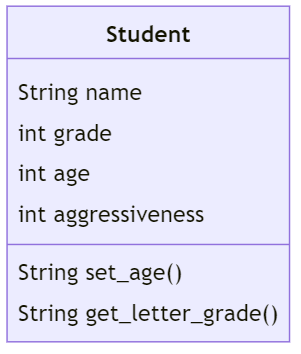

**Exercise** Add new method to the class above: "describe_aggressiveness" with the following logic: If agressiveness more than 85 then describe it as "Angry", if between 50 and 85, describe it as "Normal" and if it is below normal then call it "Calm"

Also edit the \_\_repr__ function to include this description

In [ ]:
%%postcell exercise_025_110_b

#Type code here

In [ ]:
bart = Student("Bart", 34, 81, 10)
bart

In [ ]:
bart.age

In [ ]:
bart.grade

In [ ]:
bart.get_letter_grade()

In [ ]:
bart.grade = 96

In [ ]:
bart.get_letter_grade()

In [ ]:
bart.set_age(11)

In [ ]:
bart.age

In [ ]:
lisa = Student("Lisa", 97, 15, 8)

In [ ]:
lisa.age

In [ ]:
lisa.set_age(7)

In [ ]:
lisa.age

In [ ]:
bart.age, lisa.age

In [ ]:
#List of students

students = [bart
           , lisa
           , Student("Milhouse", 87, 2, 10)
           , Student("Nelson", 30, 93, 12)]

students

In [ ]:
for student in students: print(student.name, student.age)

#### Classes vs objects
In the code above, `Student` is a class. Objects are created from classes when they are _instantiated_, such as when we call `Student("Bart", 34, 81, 10)` as a function. In that scenario, `bart` is the object.

A common metaphore is to say that a class is like a cookie cutter and an object is the cookie. They are very closely related concepts and working programmers often just use the term _object_ to define the class as well as the objects created from that class.

#### Functions vs methods
Functions which access values internal to an object are called methods. For example, the `get_age` method refers to the `age` variable, which is internal to objects. 

There are several things in the class definition above which may strike you as odd.

#### `self` 
The keyword `self` is used to refer to the internal memory of the class. For example, in the snippet below
```python
...
    def get_name(self): return self.name
...
```
The term `return self.name` means, return the `name` variable, which is part of the `bart` object. The definition `def get_name(self):` means that this method accesses a value internal to the `bart` object.

The `self` keyword ensures that `bart.get_age()` returns `age`, which is specific to Bart and `lisa.get_age()` returns `age` which is specific to her.

#### `__init__()`
`__init__` is called a _constructor_. Note that there are _two_ underscores before and after the word init. Notice that we called the `Student` class as if it was a function: `Student("Lisa", 97, 15, 8)`. When we use this syntax, it is the `__init__` function which is actually called. Notice that our parameters `"Lisa", 97, 15, 8` match perfectly with the constructor defined for the class `Student`: `def __init__(self, name, grade, aggressiveness, age):` (and remember that the first argument is always self, to make sure the function can access values internal to the `Student` class.

#### `__repr__()`


**Exercise** Update class `Student` and add methods `set_aggressiveness` and `set_grade`

**Exercise** Add a parameter `happiness` to `Student`. Set the value to whatever you like. Make sure you update:
    * The constructor
    * The `__repr__` method
    * Add methods `get_happiness` and `set_happiness`

### Classes also provide inheritance, necessary for "object oriented" programming
For our purpose, inheritance is one of the most important properties of object oriented programming. Although this concept is not universally liked in the software engineering community, most mainstream programmers use inheritance, at least to some extent, to organize their code. For our purpose, several important data science libraries are organized using inheritance.

The concept is simple: share behavior via a heirarchical graph of classes. As is often the case, an example will make the definition clearer.

We have defined a `Student` class, but now we wish to keep track of adults at the school as well. Like students, adults have names, ages and aggressiveness. The `grade` variable makes no sense for adults, since they have already graduated. On the other hand, adults _do_ have professions, which doesn't make sense for students.

First, let's define a class called `Staff`. Later we will see how we can extract common functionality into a _parent_ class

In [ ]:
class Staff():
    
    def __init__(self, name, profession, aggressiveness, age):
        self.name = name
        self.profession = profession
        self.aggressiveness = aggressiveness
        self.age = age
    
    def __repr__(self):
        return f'Staff(name={self.name}, profession={self.profession}, aggressiveness={self.aggressiveness}, age={self.age})'
    
    def get_name(self): return self.name
    def get_profession(self): return self.profession
    def get_aggressiveness(self): return self.aggressiveness
    def get_age(self): return self.age
    
    def set_age(self, age): self.age = age

In [ ]:
skinner = Staff("Skinner", "Principal", 64, 46)
skinner

Notice that the `Student` and `Staff` classes are _very_ similar:

![](images/class_diff.png)

Several functions are exactly the same.


#### Class heirarchy
We will extract common functionality into a class called `Person`, add to it functionality which is common to both, students and staff. We wil then change `Student` and `Staff` classes to only contain code which is specific to them and make sure these classes _inherit_ from the Person class:

In [ ]:
class Person():
    
    def __init__(self, name, aggressiveness, age):
        self.name = name
        self.aggressiveness = aggressiveness
        self.age = age
    
    def get_name(self): return self.name
    def get_aggressiveness(self): return self.aggressiveness
    def get_age(self): return self.age
    
    def set_age(self, age): self.age = age

In [ ]:
class Staff(Person): #<=== Notice that the class Staff "inherits" from the class "Person", aka Person is the "super class" of Staff
    
    def __init__(self, name, profession, aggressiveness, age):
        super().__init__(name, aggressiveness, age) #<=== Notice that the constructor of the super class is called first
        self.profession = profession
    
    def __repr__(self):
        return f'Staff(name={self.name}, profession={self.profession}, aggressiveness={self.aggressiveness}, age={self.age})'
    
    def get_profession(self): return self.profession


In [ ]:
class Student(Person): #<=== Notice that the class Student "inherits" from the class "Person", aka Person is the "super class" of Student
    
    def __init__(self, name, grade, aggressiveness, age):
        super().__init__(name, aggressiveness, age)
        self.grade = grade
    
    def __repr__(self):
        return f'Student(name={self.name}, grade={self.grade}, aggressiveness={self.aggressiveness}, age={self.age})'
    
    def get_grade(self): return self.grade

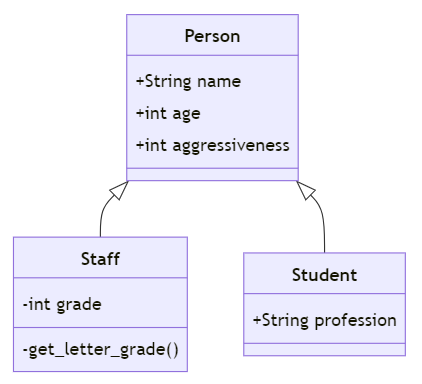

Reference: https://mermaid.live/edit#pako:eNp1UNtKw0AQ_ZVlnhSTYu7t4qMfIBRfJFCWZhIXNrNhMxFjzL-7SVtoRedld85lbhMcbYUgIQzDklizQSleSX-g6zWPokPbGSxppY9G9f2zVo1TbUnCx4uXWRJP32Eo9qzq-i94qJD4hpDiYc9OUyNItfib0sRCNf_AjcO-9-ORf06KdapLm-mELXFp0TlbLx5LJ26-tfmhr0zh0sXvV-EV1iAfDDKjO6zU3f25EgTQomuVrvwF1yol8Dv6lUD6b4W1GgyXUNIiVQPb_UhHkOwGDGDoKsV4vifIWpneo52iN2vbi8inICf4BJmkxSZNkm0SRUUeZUmeBzCCjLNokxVJvMvzfBel2zieA_haKzxusvkHocCW4w

In [ ]:
skinner = Staff("Skinner", "Principal", 64, 46)
skinner

In [ ]:
bart = Student("Bart", 34, 81, 10)
bart

**Exercise** Add a parameter `happiness` to `Student`. Set the value to whatever you like. Make sure you update:

    - The constructor
    - The `__repr__` method
    - Add methods `get_happiness` and `set_happiness`
    (yes, this is the same exercise as above, but here it is to be done with this new `Student` class)

In [ ]:
school_people = [Student("Milhouse", 87, 2, 10)
 , Student("Nelson", 30, 93, 12)
 , Staff("Willie", "Groundskeeper" , 98, 64)
]

school_people

In [ ]:
for person in school_people: print(person.get_name(), person.get_age(), type(person))

Notice that we were able to access common functionality of different types of objects.

*Exercise* Add another child class `Professor`, along with the existing `Student` and `Staff` classes.
This class needs to have the following properties: name, aggressiveness, age, **is_tenured** (boolean value).

In [ ]:
%%postcell exercise_025_110_c

a = 10
b = 20
#Type code here

#### Using class heirarchy for _interfaces_: plug-ins or extensible libraries

Scikit-learn is an extremely powerful library for data science. It comes with many modules and is organized in a way that you can use any number of algorithms, without necessarily knowing how they work. Here is an example from our scikit-learn lecture:

Decision tree classifier

```python
from sklearn import tree

model = tree.DecisionTreeClassifier(splitter='best', criterion='gini')
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
model.score(X_test, y_test)
```

Random forest classifier
```python
from sklearn import ensemble

model = ensemble.RandomForestClassifier(n_estimators=100, min_samples_split=2)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
model.score(X_test, y_test)
```

SVM classifier
```python
from sklearn import svm

model = svm.SVC(C=1.0, kernel='rbf')
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
model.score(X_test, y_test)
```

Notice they all look _very_ similar. Once you learn hwo to use a decision tree, you can use the SVM classifier with trivial ease! In fact, you can use _ANY_ classifier in the library because you already know how to use the `fit`, `predict` and `score` methods.

Obviously, all three are classes that follow the same naming scheme. What if there was a super class that just provided a skeleton of methods (names and arguments) that all future Classifier had to implement? Wouldn't that be a very concise way of _communicating_ with other developers?

```python
class BaseClassifier():
    def fit(X_train, y_train): pass
    def predict(X_test): pass
    def score(X_train, y_train): pass
```

In reality the interfaces are more complex (see the scikit-learn lecture for more information)

### Recursive classes or data structures: what if classes had properties ... of the same class?

In [ ]:
#Simplified Staff

class Staff():
    
    def __init__(self, name, supervisor):
        self.name = name
        self.supervisor = supervisor
    
    def __repr__(self): return f"Name={self.name}, Supervisor={self.supervisor if self.supervisor else None}"

In [ ]:
mr_burns = Staff("Burns", supervisor=None)

In [ ]:
homer = Staff("Homer", supervisor = mr_burns)

In [ ]:
homer

This is a very important property, needed to build data structures from linked lists to trees and graphs. We will investigate these in the recursion and data structures lectures